# **Challenge: Modelos de Classificação**

In [ ]:
#Importando as bibliotecas
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score


### **1- a. Faça uma análise inicial sobre esse dataset




In [ ]:
#Carregamento e leitura de arquivo
df_iris_original =  pd.read_csv('_iris.csv')

In [ ]:
# Exibir as primeiras linhas do dataframe para verificar a estrutura
print("Primeiras linhas do DataFrame:")
df_iris_original.head()


Primeiras linhas do DataFrame:


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Tradução dos nomes das colunas
df_iris_original.columns = ['Comprimento_Sepala', 'Largura_Sepala', 'Comprimento_da_Petala', 'Largura_da_Petala', 'Especies']

# Confirmar a tradução e a estrutura
print("\nPrimeiras linhas do DataFrame após a tradução das colunas:")
print(df_iris_original.head())

df_iris_pt = df_iris_original


Primeiras linhas do DataFrame após a tradução das colunas:
   Comprimento_Sepala  Largura_Sepala  Comprimento_da_Petala  \
0                 5.1             3.5                    1.4   
1                 4.9             3.0                    1.4   
2                 4.7             3.2                    1.3   
3                 4.6             3.1                    1.5   
4                 5.0             3.6                    1.4   

   Largura_da_Petala Especies  
0                0.2   setosa  
1                0.2   setosa  
2                0.2   setosa  
3                0.2   setosa  
4                0.2   setosa  


b. Use o boxplot e o histograma para caracterizar as propriedades
de cada uma das espécies existentes.






Contagem de espécies:
Especies
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


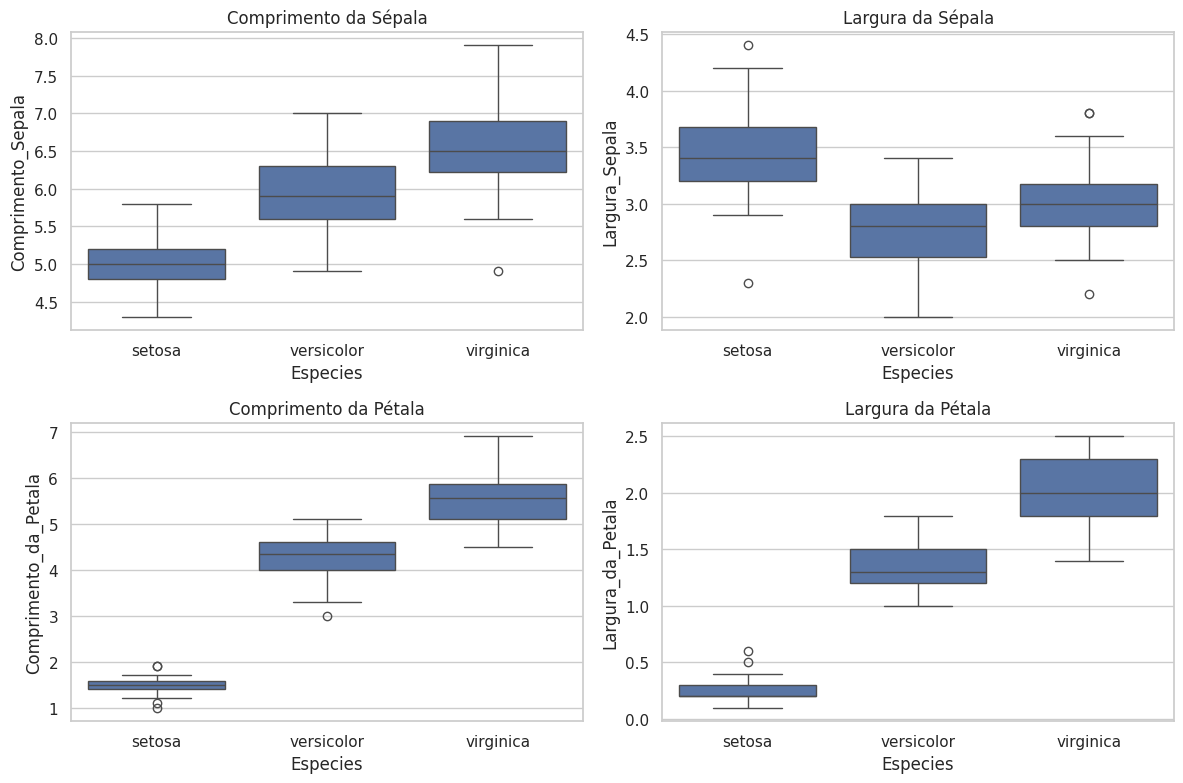

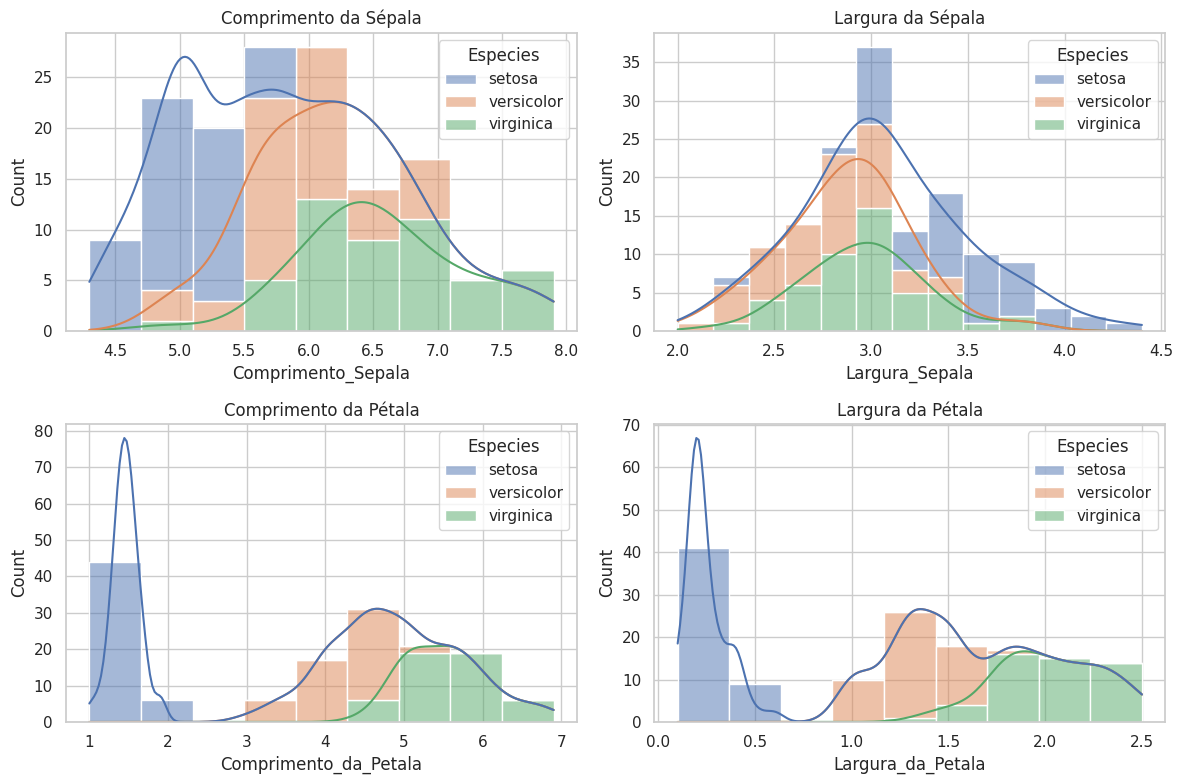

In [ ]:
# Análise das classificações das espécies
valores = df_iris_pt['Especies'].value_counts()
print("\nContagem de espécies:")
print(valores)

# Configuração dos gráficos
sns.set(style="whitegrid")

# Criação dos boxplots separado por colunas
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x="Especies", y="Comprimento_Sepala", data=df_iris_pt)
plt.title('Comprimento da Sépala')

plt.subplot(2, 2, 2)
sns.boxplot(x="Especies", y="Largura_Sepala", data=df_iris_pt)
plt.title('Largura da Sépala')

plt.subplot(2, 2, 3)
sns.boxplot(x="Especies", y="Comprimento_da_Petala", data=df_iris_pt)
plt.title('Comprimento da Pétala')

plt.subplot(2, 2, 4)
sns.boxplot(x="Especies", y="Largura_da_Petala", data=df_iris_pt)
plt.title('Largura da Pétala')

plt.tight_layout()
plt.show()

# Criação dos histogramas separados por colunas
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(data=df_iris_pt, x="Comprimento_Sepala", hue="Especies", multiple="stack", kde=True)
plt.title('Comprimento da Sépala')

plt.subplot(2, 2, 2)
sns.histplot(data=df_iris_pt, x="Largura_Sepala", hue="Especies", multiple="stack", kde=True)
plt.title('Largura da Sépala')

plt.subplot(2, 2, 3)
sns.histplot(data=df_iris_pt, x="Comprimento_da_Petala", hue="Especies", multiple="stack", kde=True)
plt.title('Comprimento da Pétala')

plt.subplot(2, 2, 4)
sns.histplot(data=df_iris_pt, x="Largura_da_Petala", hue="Especies", multiple="stack", kde=True)
plt.title('Largura da Pétala')

plt.tight_layout()
plt.show()

c. Somente olhando esses gráficos, é possível utilizando uma ou
mais das propriedades (Sepal_Length, Sepal_Width, Petal_Length,
Petal_Width) que sejam suficientes para diferenciar entre as
diferentes espécies?

In [ ]:
'''
A propriedade mais útil para diferenciar entre as espécies é o comprimento da pétala (Petal_Length). Combinada com a largura da pétala (Petal_Width), ela oferece uma clara distinção entre setosa e as outras duas espécies, e uma boa separação entre versicolor e virginica.

Portanto, as propriedades Petal_Length e Petal_Width são suficientes para diferenciar entre as diferentes espécies de íris.
'''

d. Aplique a regressão logística para avaliar o modelo de
classificação.

In [ ]:
# Selecionar as características e a variável alvo
X = df_iris_original[['Comprimento_da_Petala', 'Largura_da_Petala']]
y = df_iris_original['Especies']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo de regressão logística
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report

(1.0,
 array([[19,  0,  0],
        [ 0, 13,  0],
        [ 0,  0, 13]]),
 '              precision    recall  f1-score   support\n\n      setosa       1.00      1.00      1.00        19\n  versicolor       1.00      1.00      1.00        13\n   virginica       1.00      1.00      1.00        13\n\n    accuracy                           1.00        45\n   macro avg       1.00      1.00      1.00        45\nweighted avg       1.00      1.00      1.00        45\n')

In [ ]:
# Selecionar as características e a variável alvo
X = df_iris_original[['Comprimento_da_Petala', 'Largura_da_Petala']]
y = df_iris_original['Especies']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo de regressão logística
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 1.0
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



e. Calcule a acurácia, precisão e recall.

In [ ]:
'''
Acurácia (Accuracy): 1.0 (ou 100%)
Precisão (Precision): Todos os valores de precisão são 1.00 (ou 100%) para cada classe: setosa, versicolor e virginica.
Recall: Todos os valores de recall são 1.00 (ou 100%) para cada classe: setosa, versicolor e virginica.

'''

f. Plote a matriz de confusao com matplotlib ou seaborn

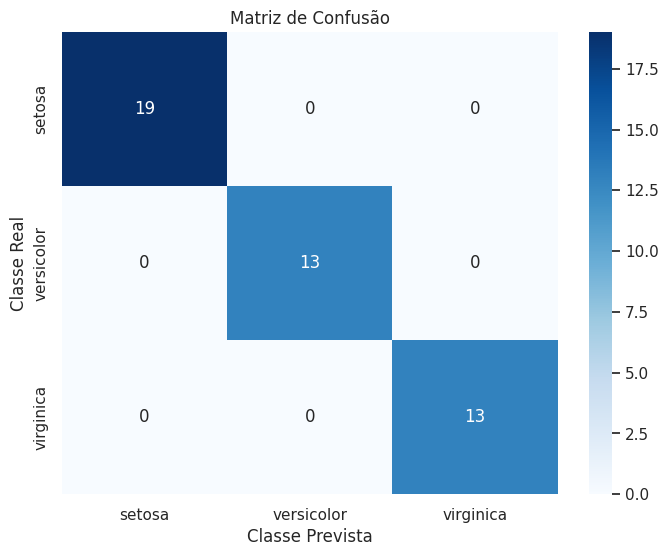

In [ ]:
# Definição dos rótulos das classes
labels = ['setosa', 'versicolor', 'virginica']

# Plot a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusão")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.show()

###2. Utilizando o dataset load_digits. Exemplo de como fazer a
###importação do dataset usando o sklearn:

    from sklearn.datasets import load_digits
    digits = load_digits()


###a. Faça uma análise inicial sobre esse dataset

###   i. Quantos dados possui?
###   ii. Existem dados nulos? Se sim quantos?
###   iii. Todos são dados numéricos ou existem colunas com dados categóricos?

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
# i. Quantidade de dados
n_samples, n_features = digits.data.shape
print("Quantidade de dados:", n_samples)
print("Quantidade de características por amostra:", n_features)

# ii. Verificar dados nulos
n_null = np.sum(np.isnan(digits.data))
print("Quantidade de dados nulos:", n_null)

# iii. Verificar se existem colunas com dados categóricos
print("Todos os dados são numéricos.")

Quantidade de dados: 1797
Quantidade de características por amostra: 64
Quantidade de dados nulos: 0
Todos os dados são numéricos.


###b. Aplique a regressão logística para avaliar o modelo de classificação.


In [ ]:
# Divisão dos dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=42)

# Treinar o modelo de regressão logística
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9666666666666667
Confusion Matrix:
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 47  1  0  0  0  0  0  2  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 52  0  1  0  0  0  0]
 [ 0  1  0  0 58  0  1  0  0  0]
 [ 0  1  0  0  0 62  1  1  0  1]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  1  0 53  0  1]
 [ 0  0  0  0  0  1  0  0 42  0]
 [ 0  0  0  1  0  0  0  0  2 56]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.96      0.94      0.95        50
           2       0.96      1.00      0.98        47
           3       0.98      0.96      0.97        54
           4       1.00      0.97      0.98        60
           5       0.94      0.94      0.94        66
           6       0.96      0.98      0.97        53
           7       0.98      0.96      0.97        55
           8       0.91      0.98      0.94        43
           9       0.97      0.95      0.96        59

   

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###c. Calcule a acurácia, precisão e recall.


In [ ]:
# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)

# Calcular a precisão
precision = precision_score(y_test, y_pred, average='weighted')

# Calcular o recall
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")

Acurácia: 0.9666666666666667
Precisão: 0.9671608402354027
Recall: 0.9666666666666667


### d. Plote a matriz de confusão com matplotlib ou seaborn


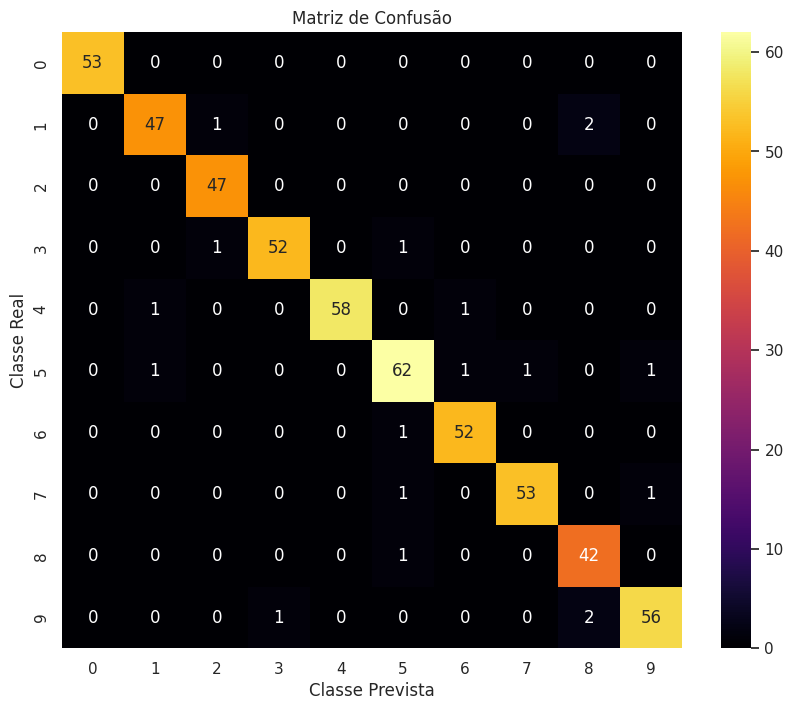

In [ ]:
# Plotar a matriz de confusão
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="inferno")
plt.title("Matriz de Confusão")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.show()

e. Aplique a regressão logística para avaliar o modelo de classificação dos dígitos de
0-9 que são disponibilizados neste dataset.


In [ ]:
# Carregar conjunto de dados
digits = load_digits()

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=42)

# Treinar o modelo de regressão logística
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9666666666666667
Confusion Matrix:
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 47  1  0  0  0  0  0  2  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 52  0  1  0  0  0  0]
 [ 0  1  0  0 58  0  1  0  0  0]
 [ 0  1  0  0  0 62  1  1  0  1]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  1  0 53  0  1]
 [ 0  0  0  0  0  1  0  0 42  0]
 [ 0  0  0  1  0  0  0  0  2 56]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.96      0.94      0.95        50
           2       0.96      1.00      0.98        47
           3       0.98      0.96      0.97        54
           4       1.00      0.97      0.98        60
           5       0.94      0.94      0.94        66
           6       0.96      0.98      0.97        53
           7       0.98      0.96      0.97        55
           8       0.91      0.98      0.94        43
           9       0.97      0.95      0.96        59

   

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


f. Calcule a acurácia, precisão e recall.


In [ ]:
# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)

# Calcular a precisão
precision = precision_score(y_test, y_pred, average='weighted')

# Calcular o recall
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")

Acurácia: 0.9666666666666667
Precisão: 0.9671608402354027
Recall: 0.9666666666666667


g. Plote a matriz de confusao com matplotlib ou seaborn

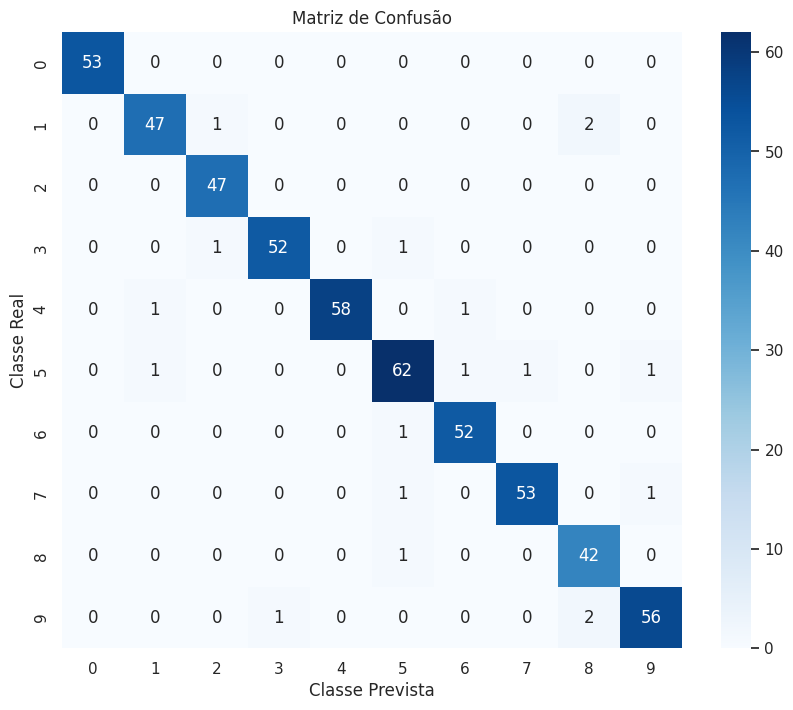

In [ ]:
# Plotar a matriz de confusão
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.show()